In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numba import njit

@njit
def initialize_agents(lattice_size, num_agents, initial_infection_rate):
    num_infected = int(num_agents * initial_infection_rate)
    agents = np.zeros((num_agents, 3), dtype=np.int32)

    # Create a shuffled array of indices
    indices = np.arange(num_agents)
    np.random.shuffle(indices)

    for i in range(num_agents):
        agents[i, 0] = np.random.randint(0, lattice_size)
        agents[i, 1] = np.random.randint(0, lattice_size)
        # Infect a random 1% of the agents, based on the indices shuffled
        agents[i, 2] = 1 if i in indices[:num_infected] else 0
    
    return agents

@njit
def move_agents(agents, lattice_size, diffusion_rate):
    for i in range(agents.shape[0]):
        if np.random.random() < diffusion_rate:
            move_x = np.random.randint(-1, 2)
            move_y = np.random.randint(-1, 2)
            agents[i, 0] = (agents[i, 0] + move_x) % lattice_size
            agents[i, 1] = (agents[i, 1] + move_y) % lattice_size

@njit
def infect_agents(agents, beta, lattice_size):
    for i in range(agents.shape[0]):
        if agents[i, 2] == 1:
            for j in range(agents.shape[0]):
                if agents[j, 2] == 0 and agents[i, 0] == agents[j, 0] and agents[i, 1] == agents[j, 1]:
                    if np.random.random() < beta:
                        agents[j, 2] = 1

@njit
def update_recovery(agents, gamma):
    for i in range(agents.shape[0]):
        if agents[i, 2] == 1 and np.random.random() < gamma:
            agents[i, 2] = 2

@njit
def update_susceptibility(agents, alpha):
    for i in range(agents.shape[0]):
        if agents[i, 2] == 2 and np.random.random() < alpha:
            agents[i, 2] = 0  # Recovered agent becomes susceptible again

@njit
def update_agents(agents, lattice_size, diffusion_rate, beta, gamma, alpha):
    move_agents(agents, lattice_size, diffusion_rate)
    infect_agents(agents, beta, lattice_size)
    update_recovery(agents, gamma)
    update_susceptibility(agents, alpha)

In [9]:
# Simulation params
lattice_size = 100
num_agents = 1000
diffusion_rate = 0.8  # Diffusion rate, probability to move
total_time_steps = 10000

In [10]:
@njit
def run_simulation(beta, gamma, alpha, initial_infection_rate):
    # Initialize agents
    agents = initialize_agents(lattice_size, num_agents, initial_infection_rate)

    # Lists to track S, I, R
    susceptible_count = []
    infected_count = []
    recovered_count = []

    # Run sim, count SIR
    for step in range(total_time_steps + 1):
        state_count = np.bincount(agents[:, 2], minlength=3)
        susceptible_count.append(state_count[0])
        infected_count.append(state_count[1])
        recovered_count.append(state_count[2])
        update_agents(agents, lattice_size, diffusion_rate, beta, gamma, alpha)

    return susceptible_count, infected_count, recovered_count

## Varying alpha, beta and gamma

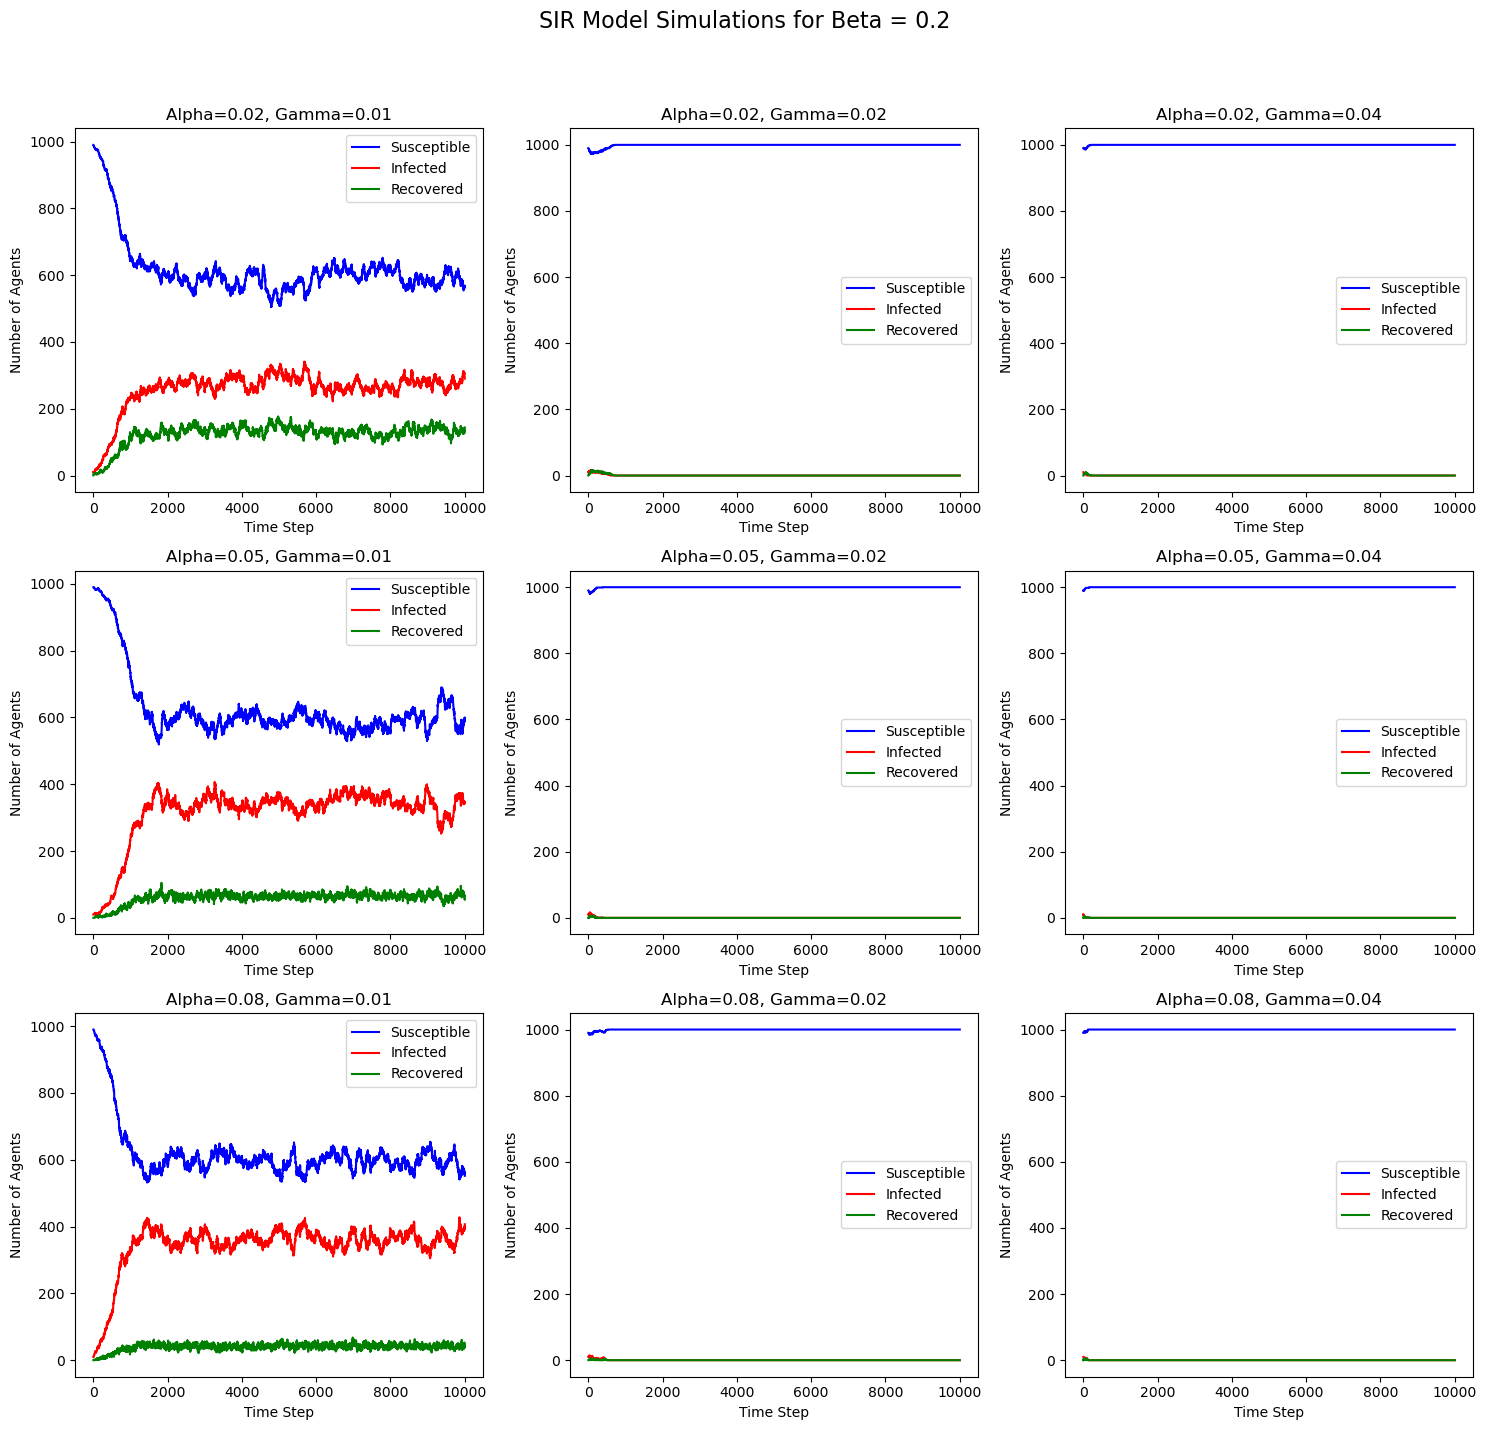

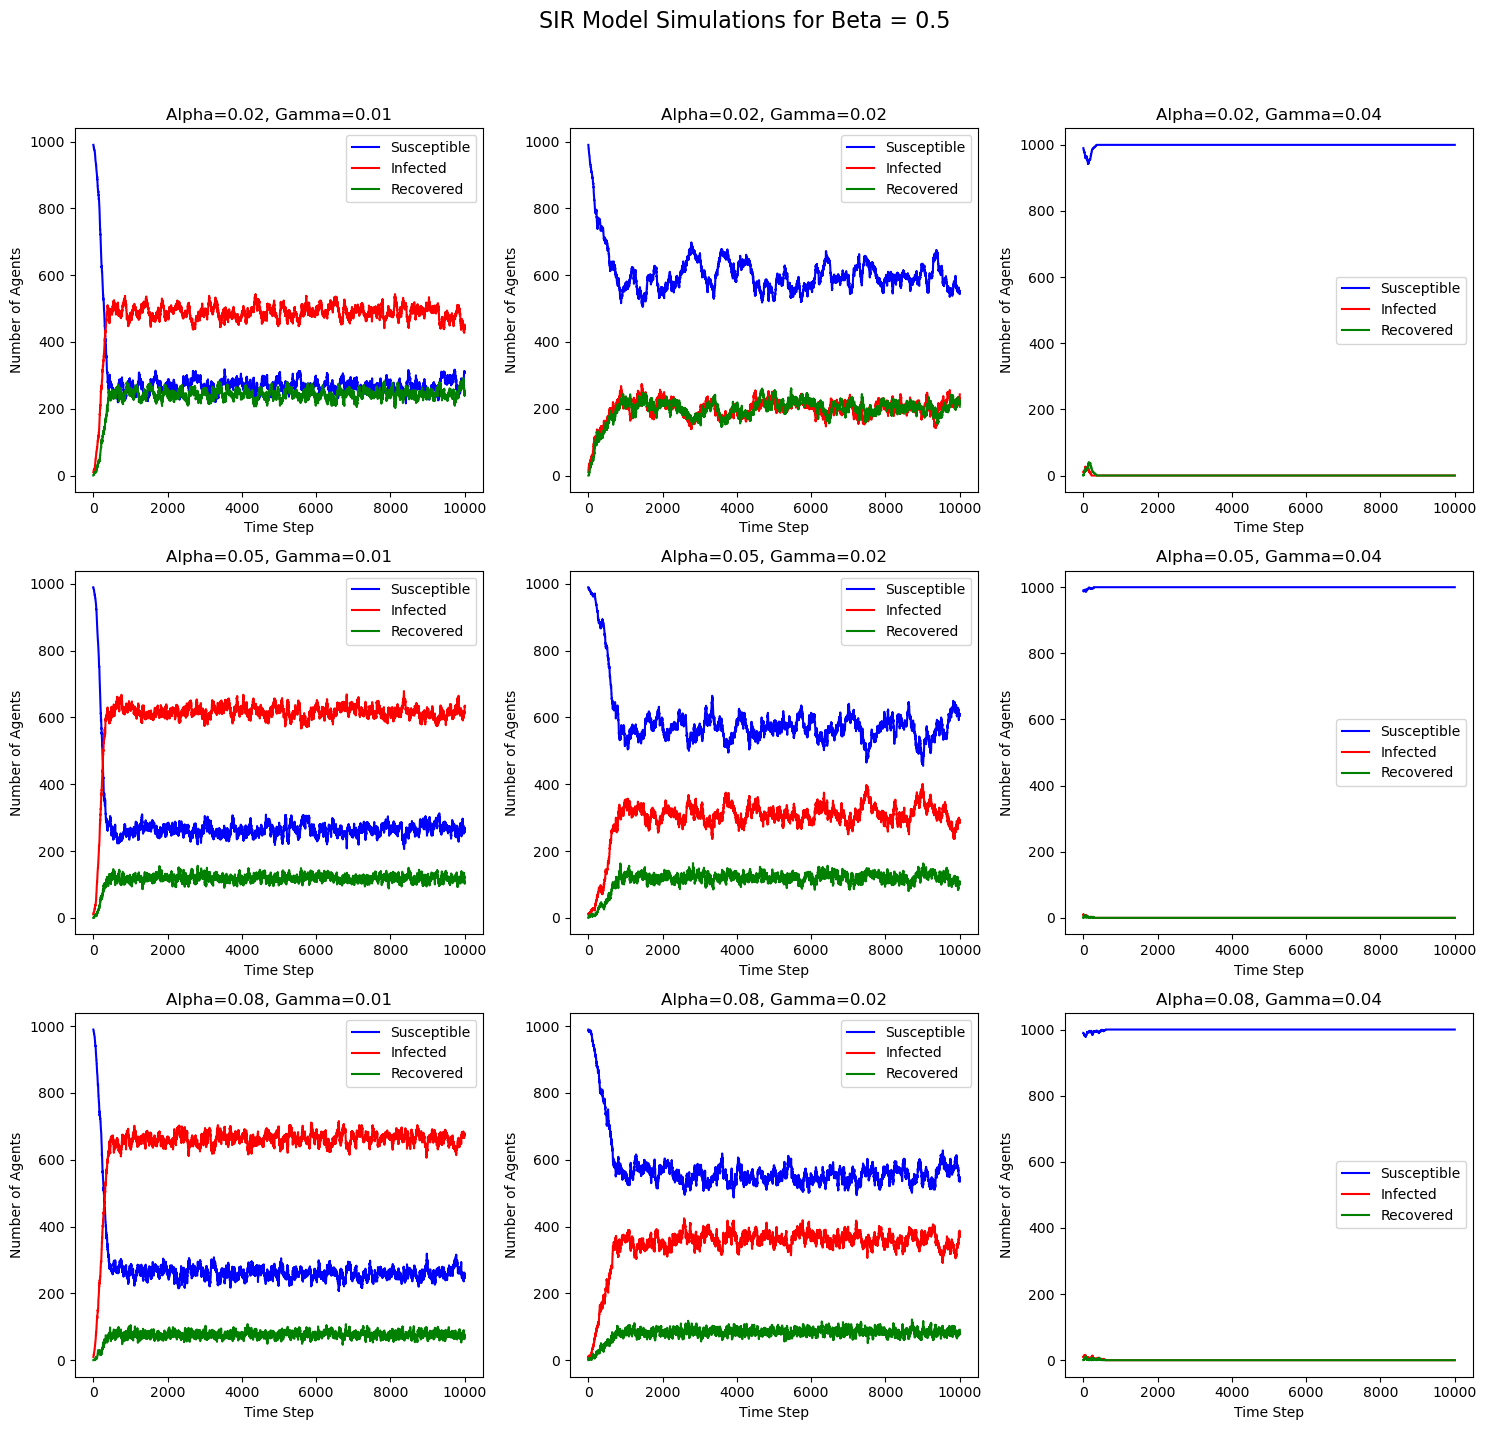

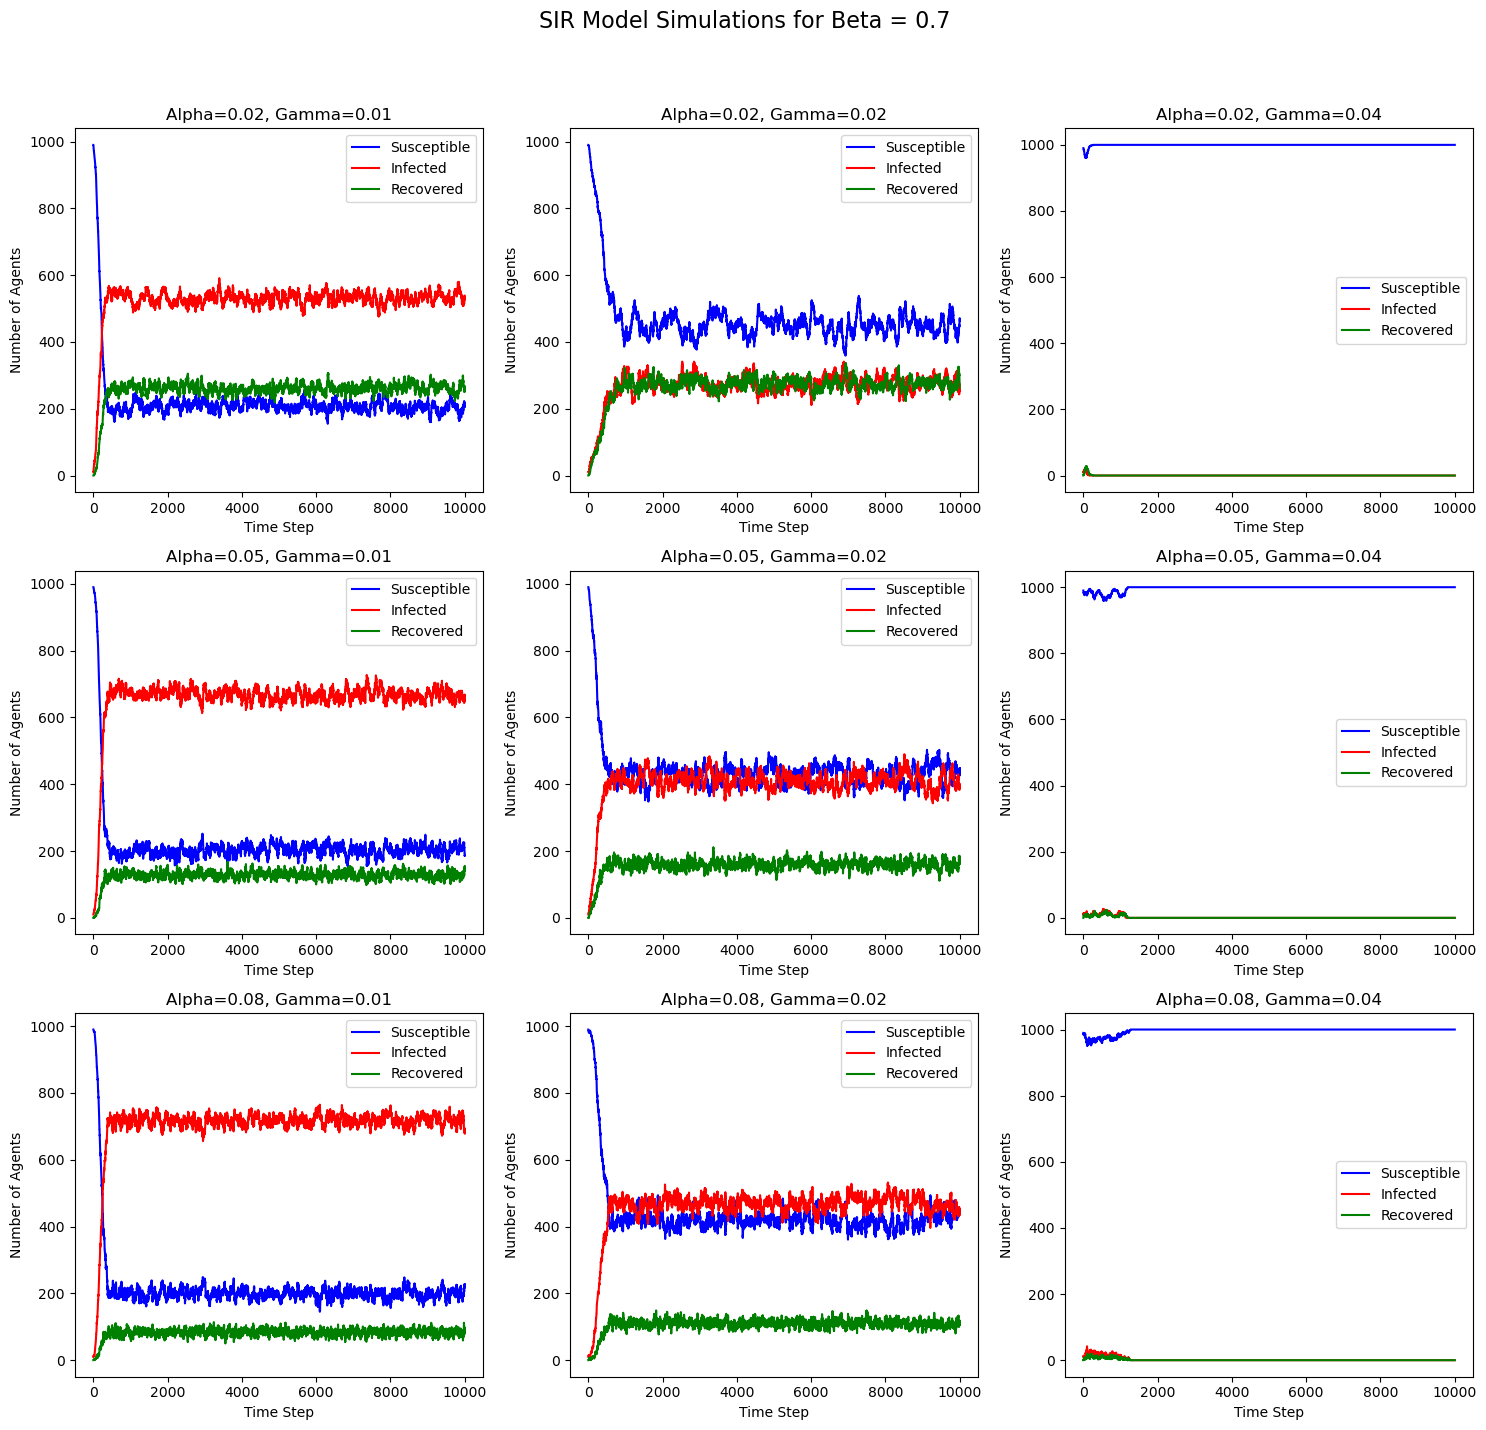

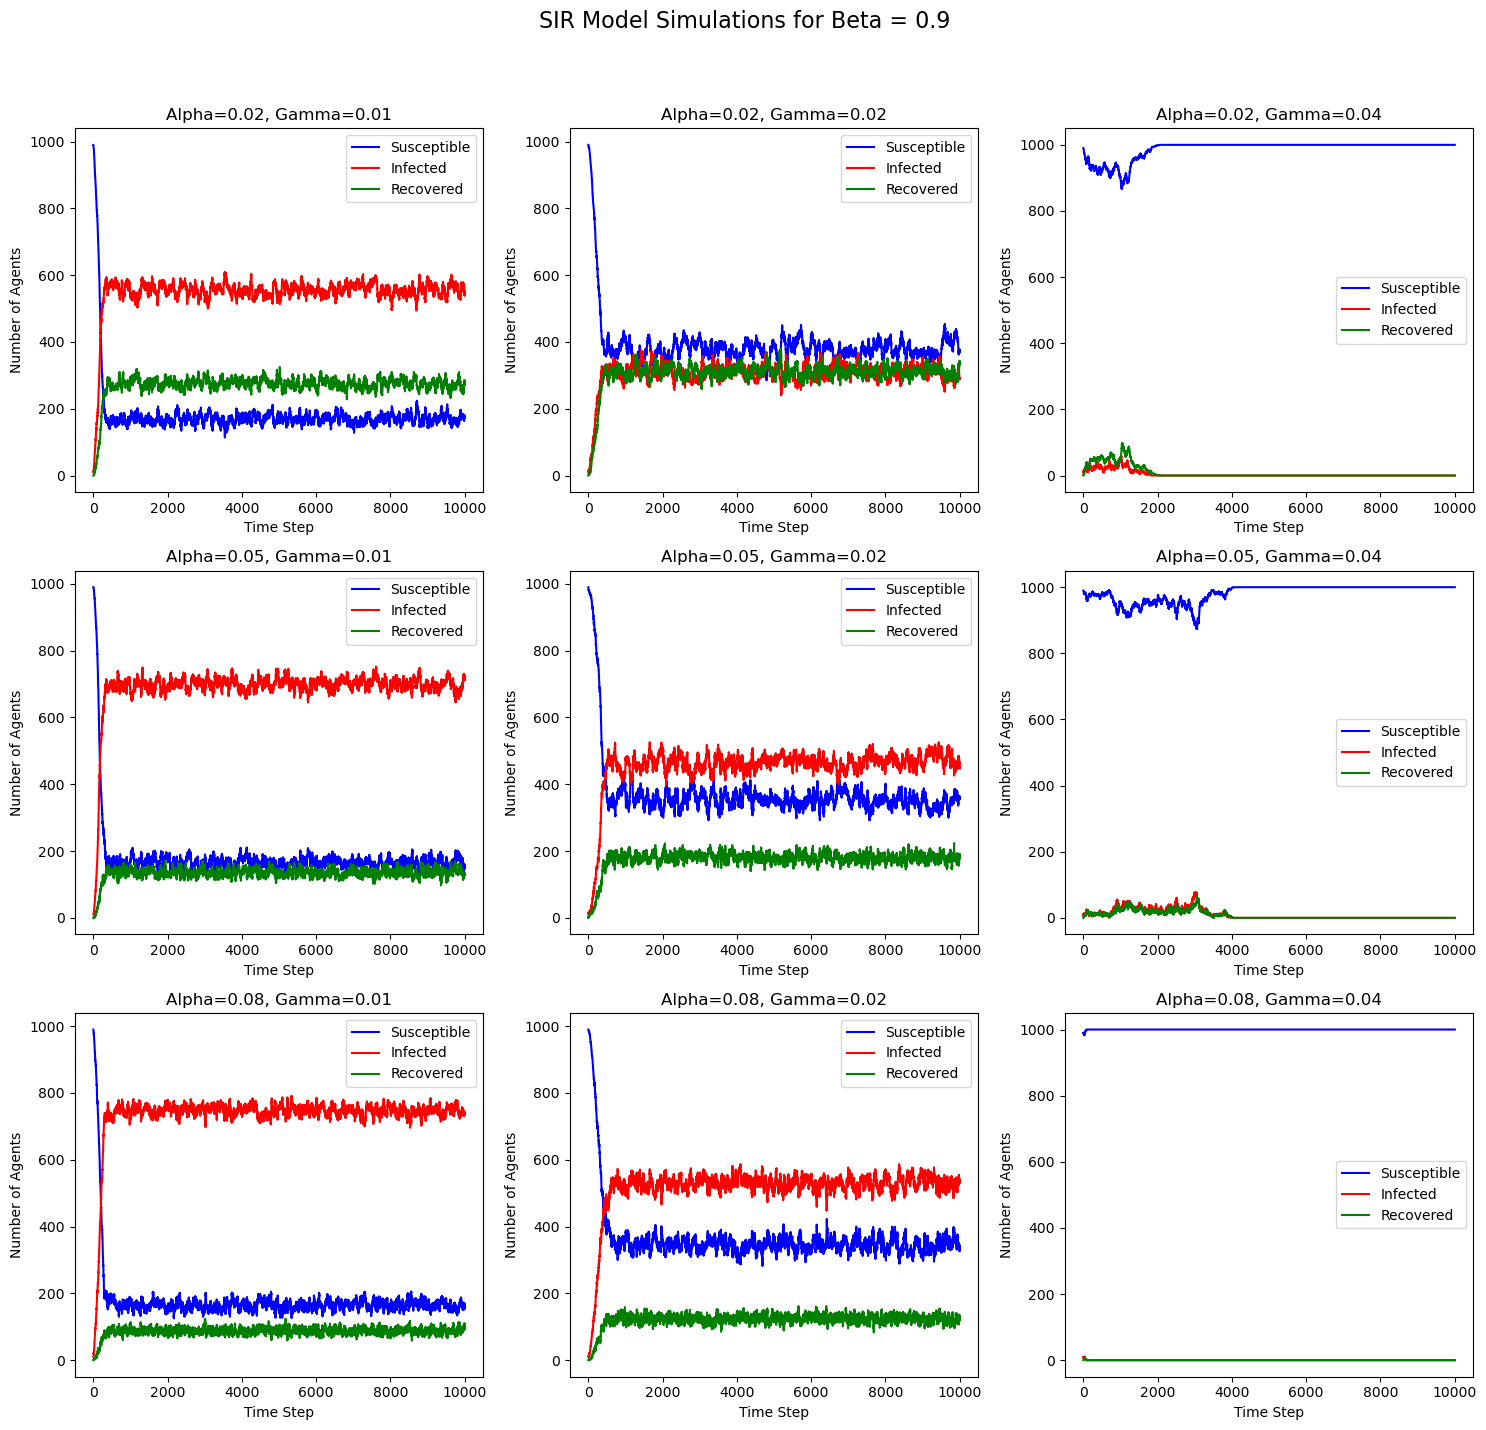

In [11]:
initial_infection_rate = 0.01
alphas = [0.02, 0.05, 0.08]
betas = [0.2, 0.5, 0.7, 0.9]
gammas = [0.01, 0.02, 0.04]

# ONE plot for each beta, containing 9 subplots for varying beta and alpha
for beta in betas:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    fig.suptitle(f'SIR Model Simulations for Beta = {beta}', fontsize=16)

    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            susceptible, infected, recovered = run_simulation(beta, gamma, alpha, initial_infection_rate)

            ax = axes[i, j]
            ax.plot(susceptible, label='Susceptible', color='blue')
            ax.plot(infected, label='Infected', color='red')
            ax.plot(recovered, label='Recovered', color='green')
            ax.set_title(f'Alpha={alpha}, Gamma={gamma}')
            ax.set_xlabel('Time Step')
            ax.set_ylabel('Number of Agents')
            ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## 10% initially infected

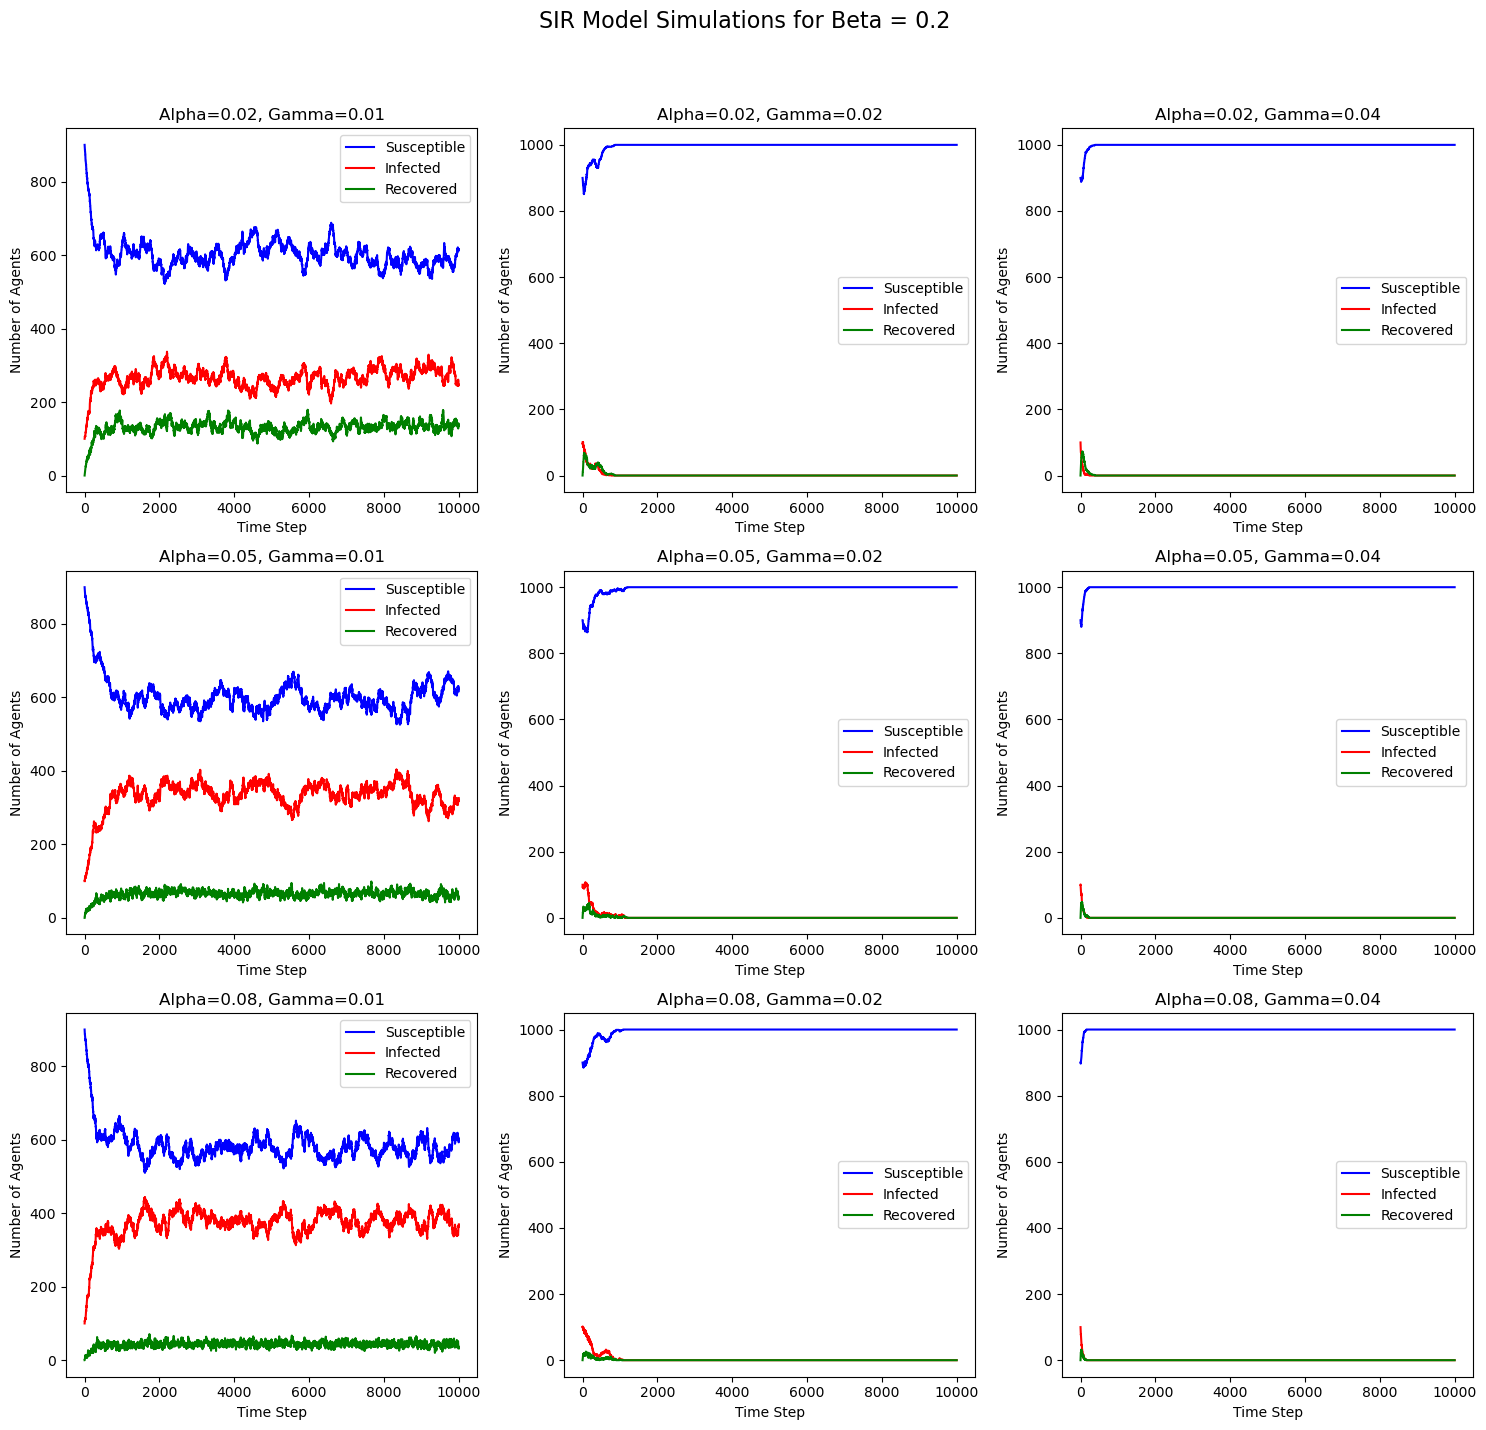

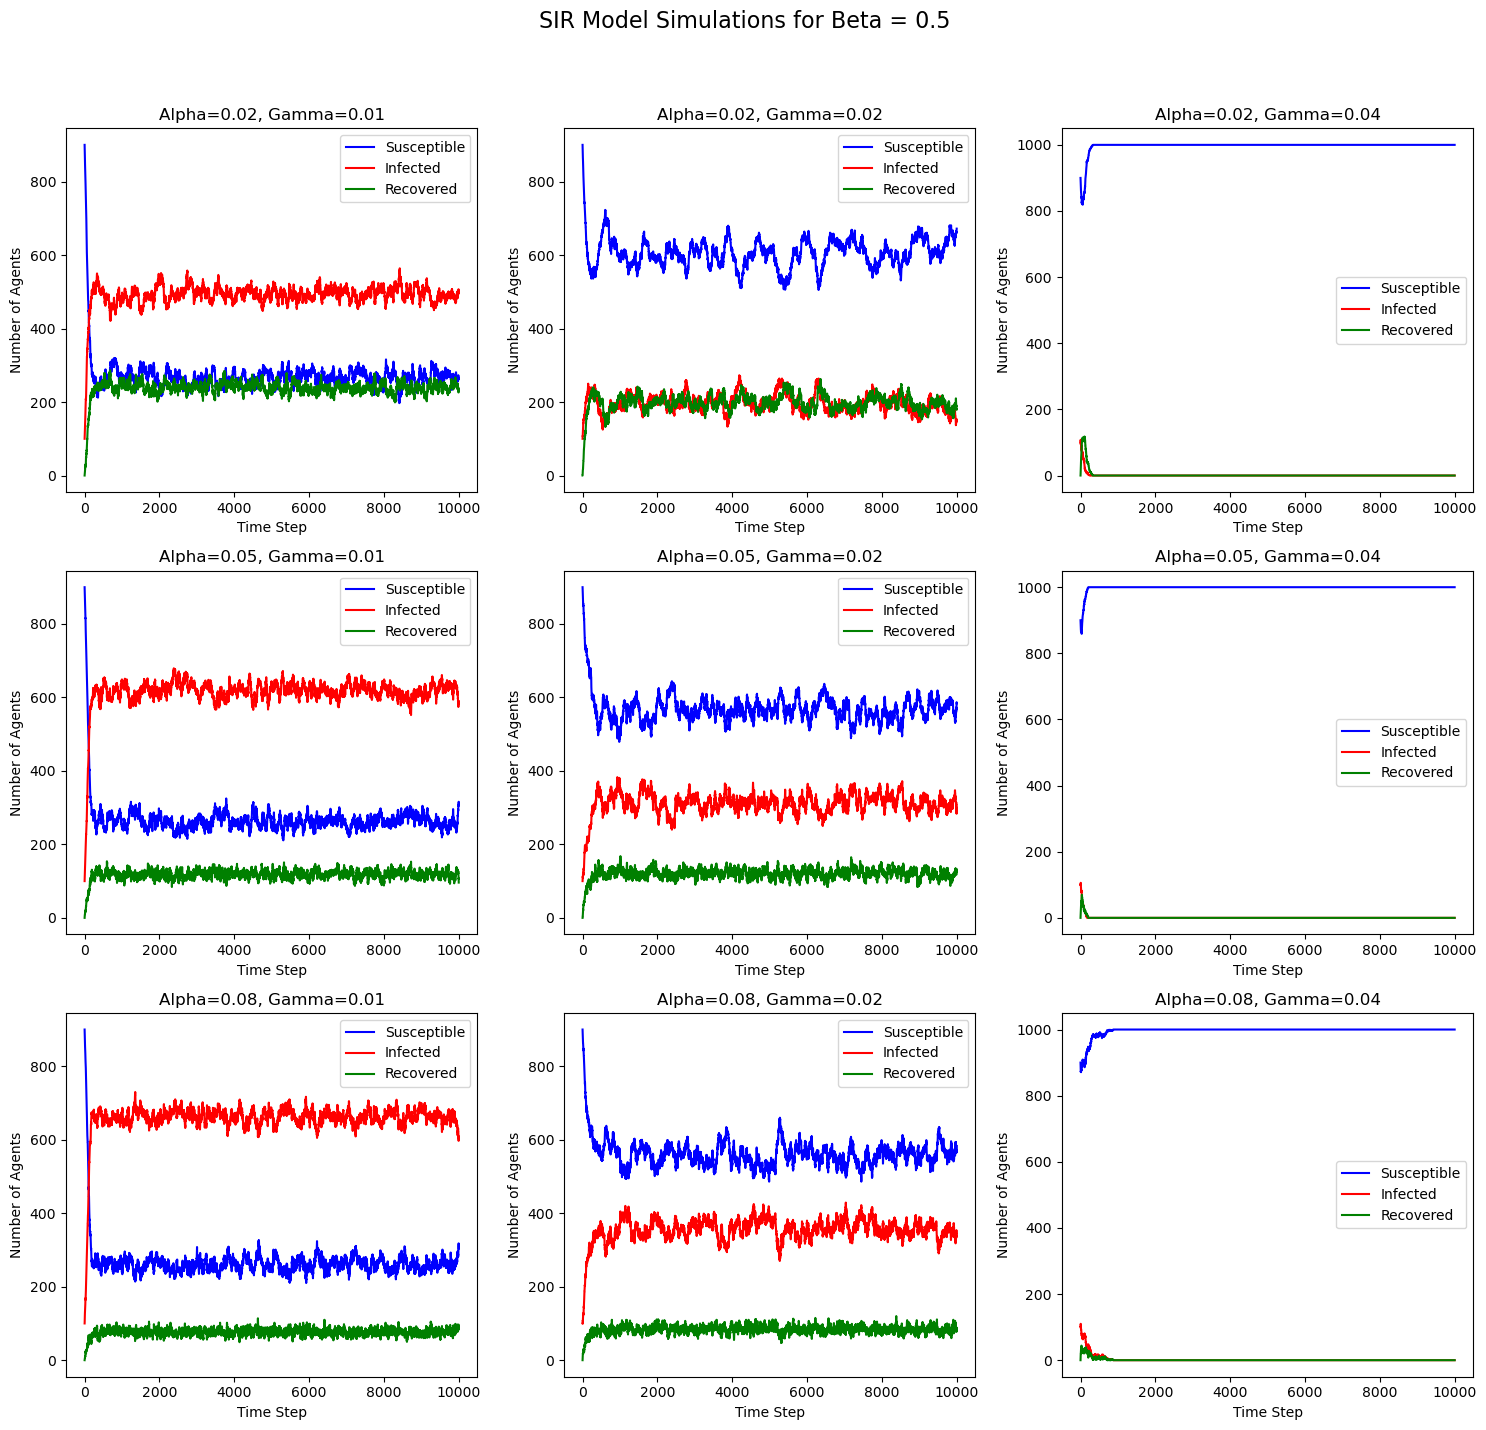

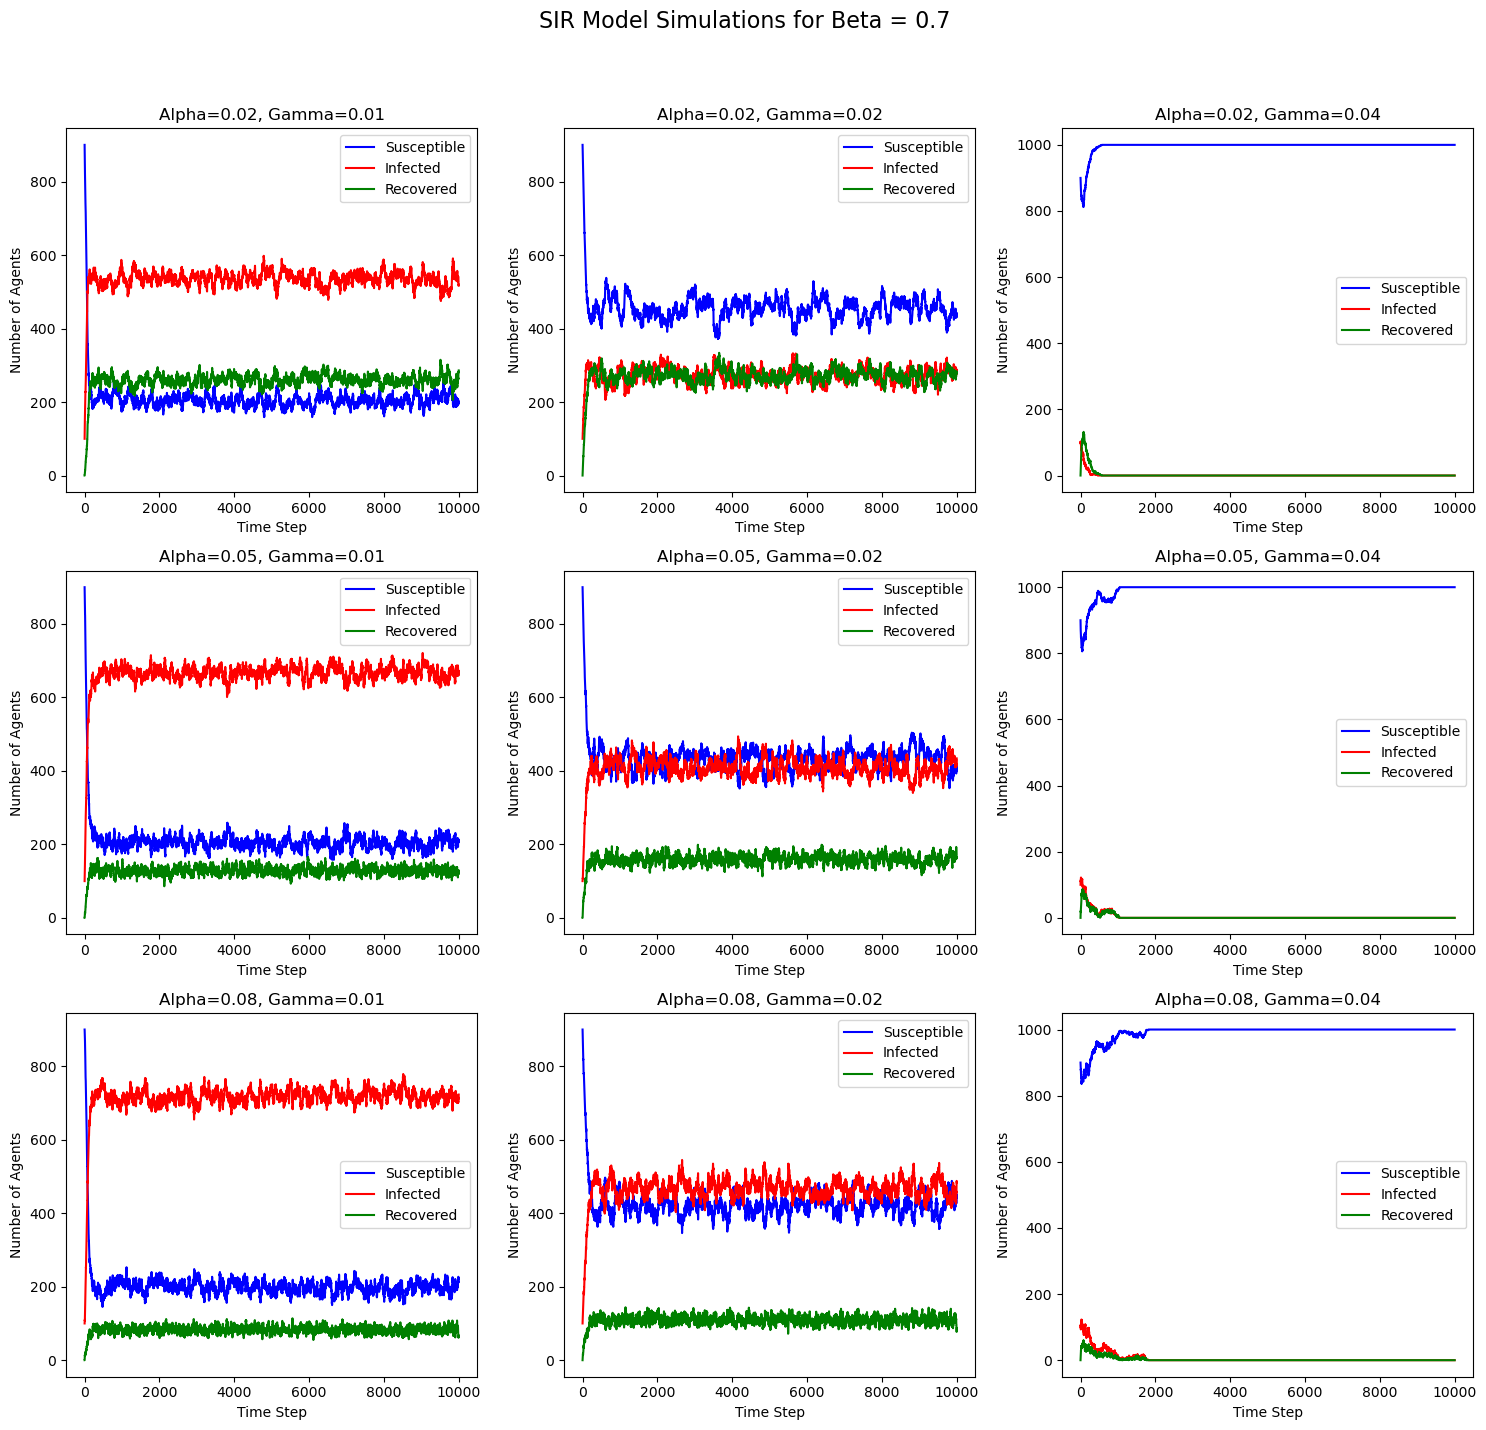

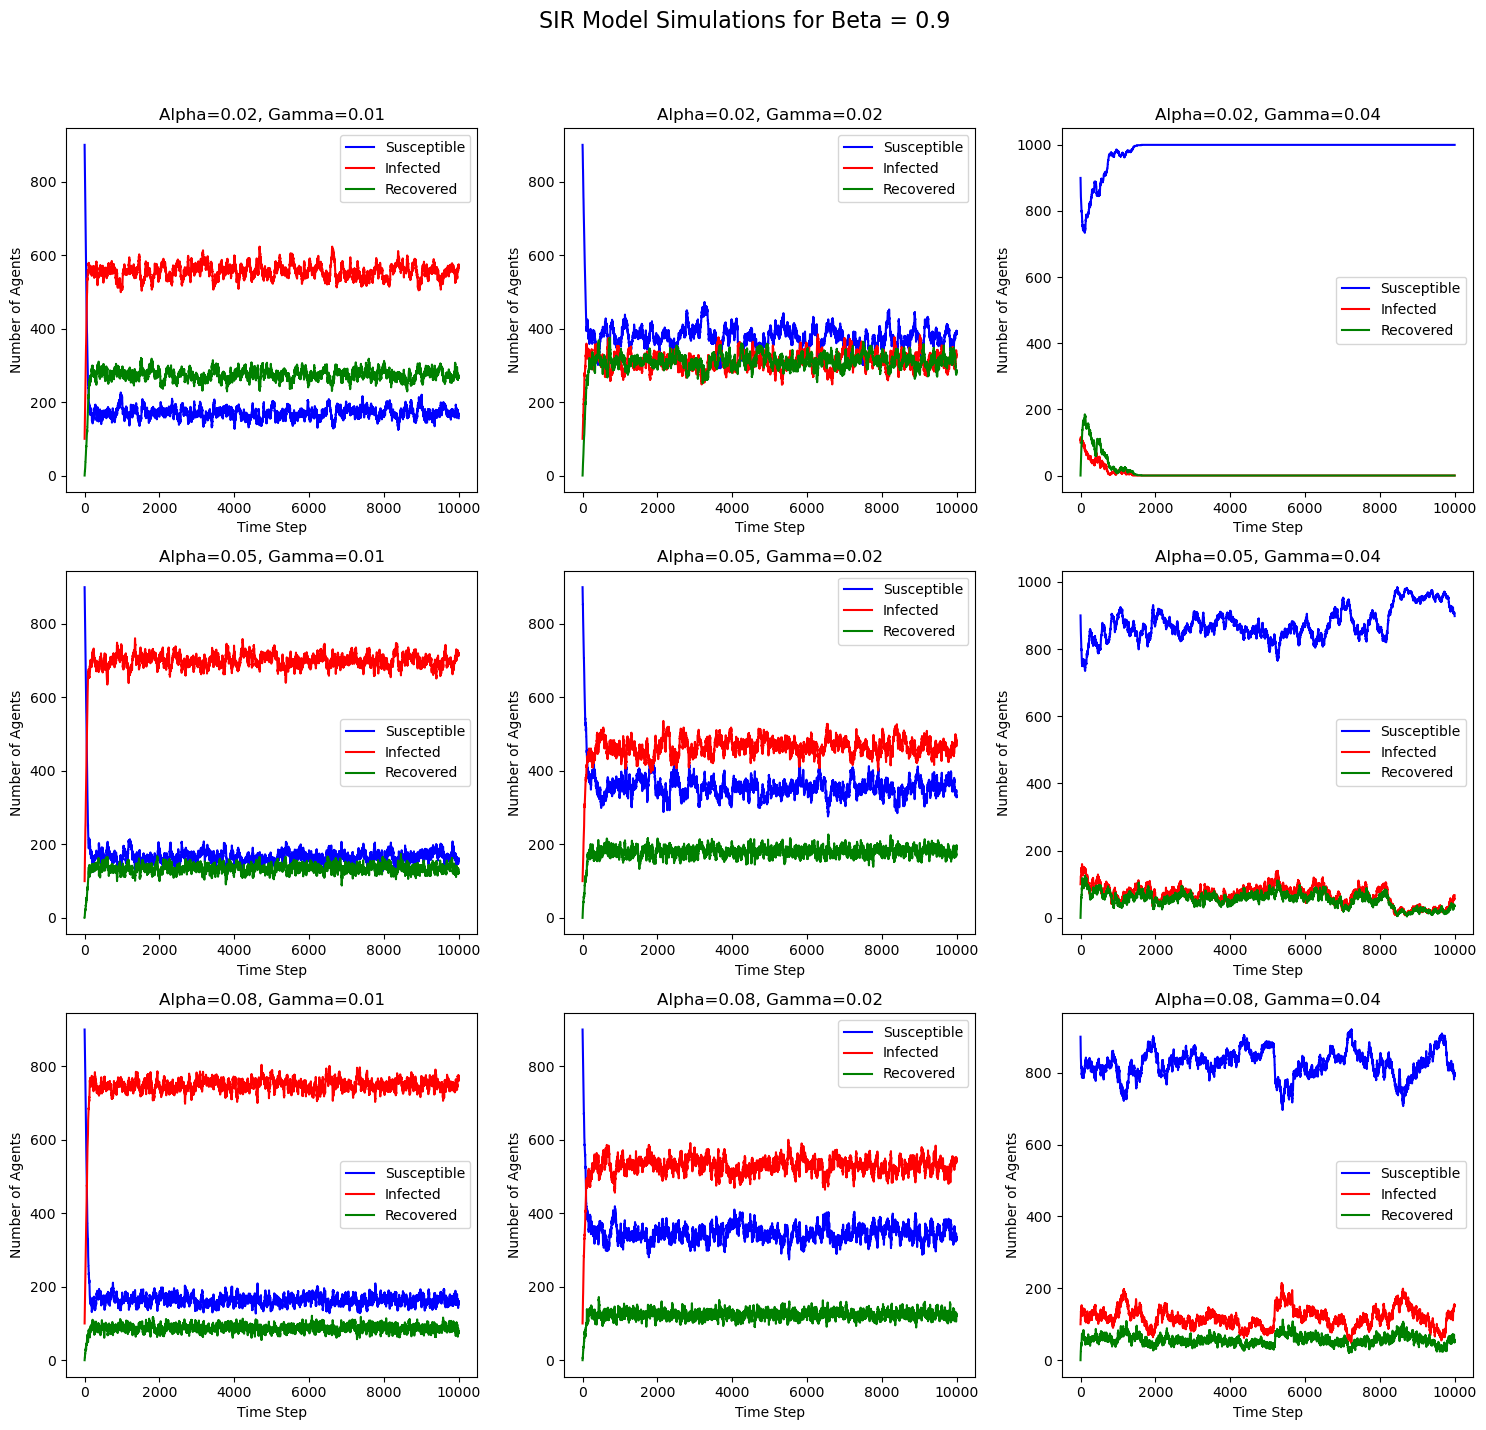

In [12]:
initial_infection_rate = 0.1
alphas = [0.02, 0.05, 0.08]
betas = [0.2, 0.5, 0.7, 0.9]
gammas = [0.01, 0.02, 0.04]

# ONE plot for each beta, containing 9 subplots for varying beta and alpha
for beta in betas:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    fig.suptitle(f'SIR Model Simulations for Beta = {beta}', fontsize=16)

    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            susceptible, infected, recovered = run_simulation(beta, gamma, alpha, initial_infection_rate)

            ax = axes[i, j]
            ax.plot(susceptible, label='Susceptible', color='blue')
            ax.plot(infected, label='Infected', color='red')
            ax.plot(recovered, label='Recovered', color='green')
            ax.set_title(f'Alpha={alpha}, Gamma={gamma}')
            ax.set_xlabel('Time Step')
            ax.set_ylabel('Number of Agents')
            ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()